<a href="https://colab.research.google.com/github/NNAIZ/-My-Best-Projects-/blob/main/Decision_Tree_using_Wisconsin_BreastCancer_dataset_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
import os 
os.environ ['KAGGLE_CONFIG_DIR']='/content' # kaggle json file ke bad download hogi...

In [ ]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data
#!kaggle dataset download -d uciml/breast-cancer-wiscons-data  #download data set 

breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip \*.zip && rm *.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [ ]:
df = pd.read_csv('/content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.shape

(569, 33)

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.drop(['Unnamed: 32'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df['id'].nunique()

569

In [ ]:
df.drop(['id'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_w

<ipython-input-105-f4e48aa3ae5e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =df.corr()


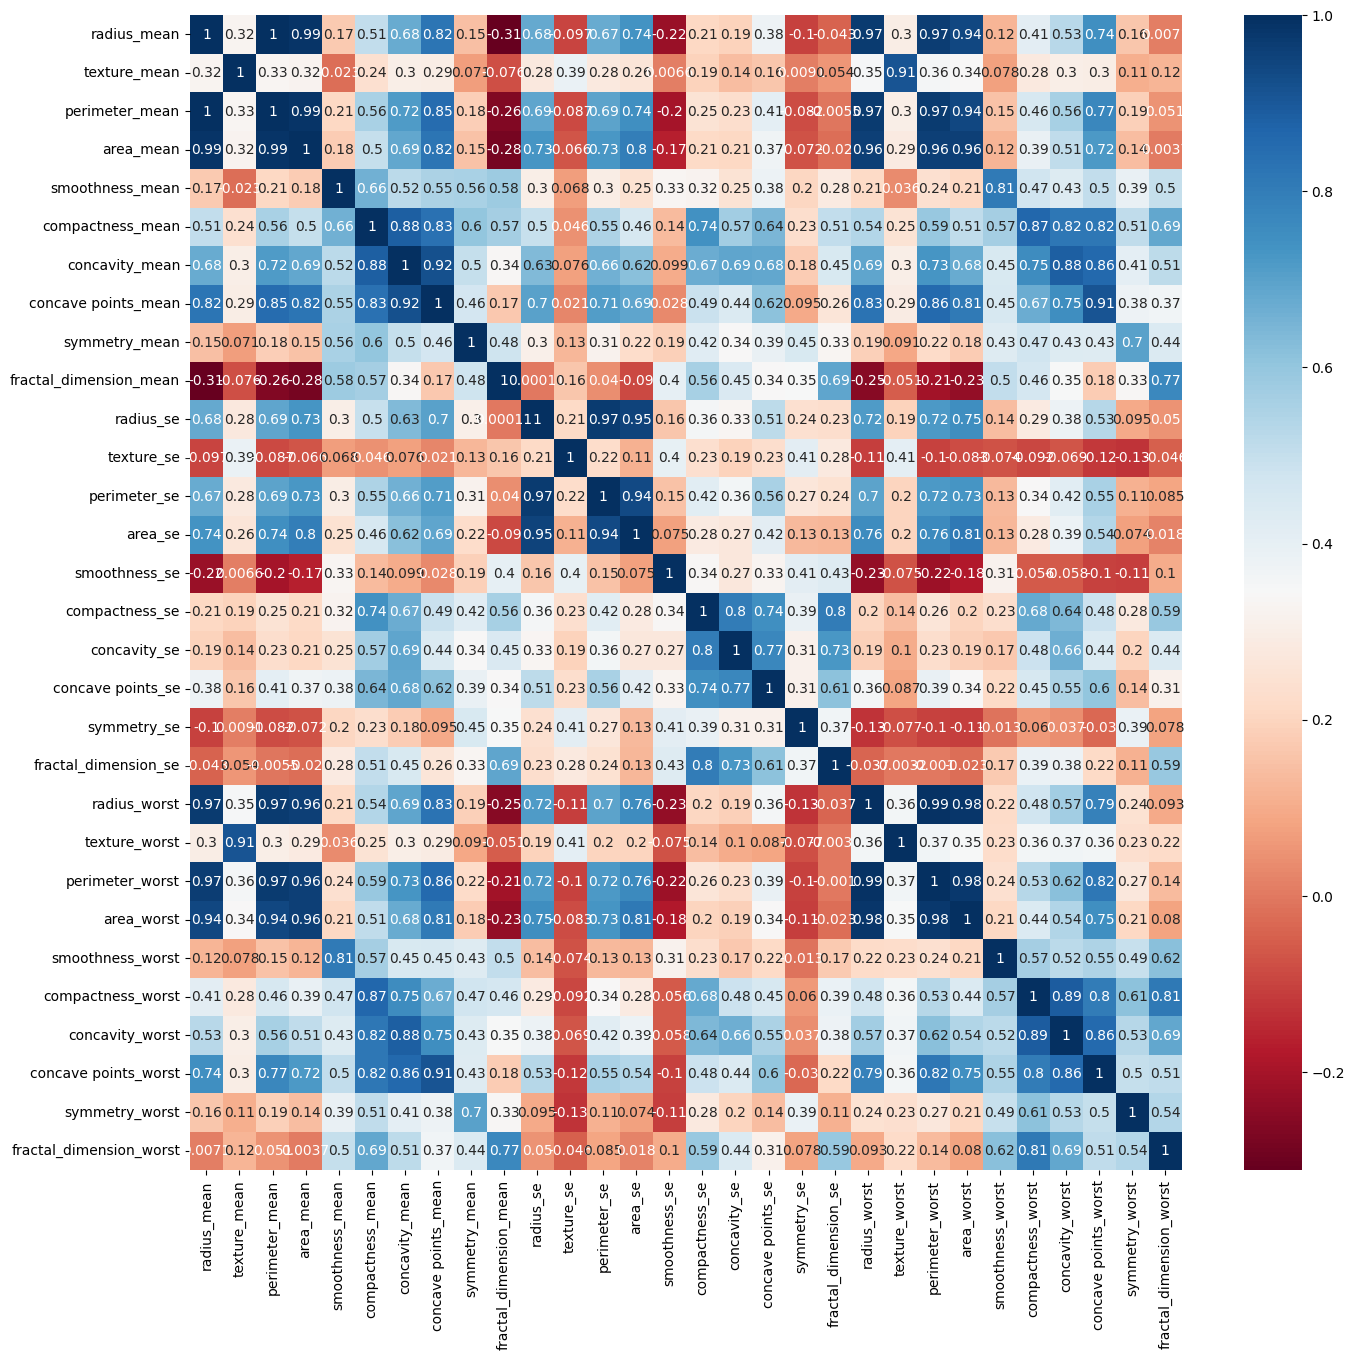

In [ ]:
corr =df.corr()
plt.figure(figsize=(16,15))
#corr=corr[abs(corr)>=0.9]
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

In [ ]:
high_corr_cols =['concave points_mean','perimeter_se','radius_worst','area_mean',
                 'perimeter_mean','texture_worst','area_se','perimeter_worst',
                 'concave points_worst','area_worst']

In [ ]:
df1 =df.copy()
df1.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df1.drop(high_corr_cols,inplace=True,axis=1)
df1.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df1.shape

(569, 21)

In [ ]:
df1['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
x=df1.drop('diagnosis',axis=1)
y=df1['diagnosis']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(569, 20)
(569,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
df1.columns

AttributeError: ignored

In [ ]:
from sklearn.model_selection import train_test_split 
X_train ,X_test ,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=22)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(426, 20)
(143, 20)
(426,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score 

In [ ]:
def eval_model(y_test,y_pred):
    acc =accuracy_score(y_test,y_pred)
    print('Accurancy_Score',acc)
    cm=confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Calssification Report\n',classification_report(y_test,y_pred))
     
def mscore(model):
    train_score = model.score(X_train,y_train)
    test_score =model.score(X_test,y_test)
    print('Training Score',train_score)
    print('Testing Score',test_score)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df1 =DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=15)
df1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=15)

In [ ]:
mscore(df1)


Training Score 0.9765258215962441
Testing Score 0.9230769230769231


In [ ]:
ypred_df1 =df1.predict(X_test)
print(ypred_df1)

['B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M'
 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B'
 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B']


In [ ]:
eval_model(y_test,ypred_df1)

Accurancy_Score 0.9230769230769231
Confusion Matrix
 [[86  2]
 [ 9 46]]
Calssification Report
               precision    recall  f1-score   support

           B       0.91      0.98      0.94        88
           M       0.96      0.84      0.89        55

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.93      0.92      0.92       143



In [ ]:
from sklearn.tree import plot_tree

In [ ]:
cn=['B','M']
fn = X_train.columns
print(cn)
print(fn)

['B', 'M']
Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


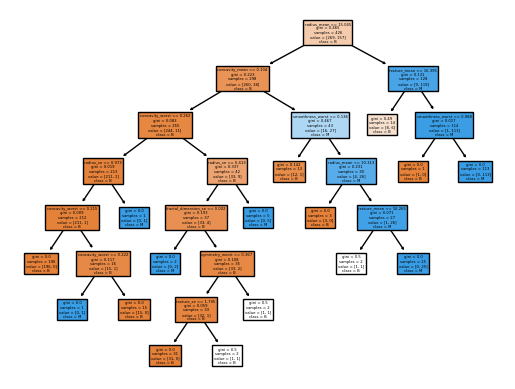

In [ ]:
plot_tree(df1,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [ ]:
df2 =DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=15)
df2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=15)

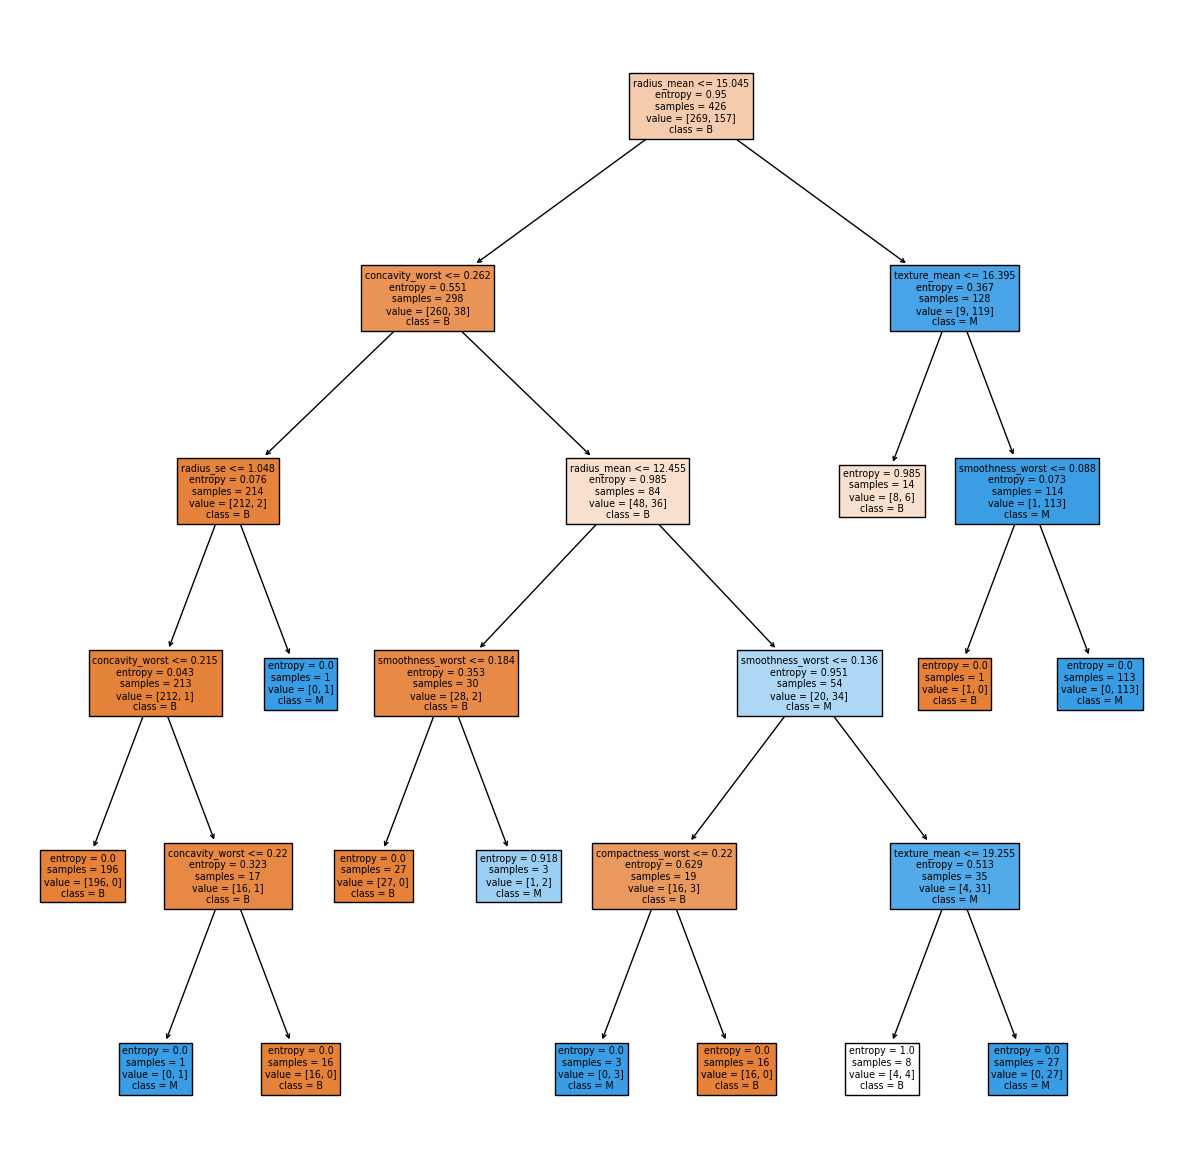

In [ ]:
plt.figure(figsize=(15,15))
plot_tree(df2,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [ ]:
ypred_df2 =df2.predict(X_test)
print(ypred_df2)

['B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M'
 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B']


In [ ]:
eval_model(y_test,ypred_df2)

Accurancy_Score 0.8951048951048951
Confusion Matrix
 [[86  2]
 [13 42]]
Calssification Report
               precision    recall  f1-score   support

           B       0.87      0.98      0.92        88
           M       0.95      0.76      0.85        55

    accuracy                           0.90       143
   macro avg       0.91      0.87      0.88       143
weighted avg       0.90      0.90      0.89       143

